In [2]:
# these are plots that are only relevant for the Software X paper
import os
import pickle 
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
from astropy.time import Time
from collections import defaultdict
import joypy as jp

In [3]:
# Useful code snippets
def jd_to_utc(jd):
    """Converts Julian Date to UTC time tag(datetime object) using Astropy"""
    #convert jd to astropy time object
    time = Time(jd, format='jd', scale='utc')
    #convert astropy time object to datetime object
    utc = time.datetime
    return utc

def utc_to_jd(utc):
    """Converts UTC time tag(datetime object) to Julian Date using Astropy"""
    #convert datetime object to astropy time object
    time = Time(utc, scale='utc')
    #convert astropy time object to jd
    jd = time.jd
    return jd

In [4]:
def load_file(simName):
    path = os.path.join(os.getcwd(), f'data/results/propagated_catalogs/{simName}.pickle')
    with open(path, 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        return data

catalogue = load_file('oneweb_starlink')
catalogue = catalogue.Catalogue
print(len(catalogue))
print(catalogue[0].__dict__.keys())

75
dict_keys(['launch_date', 'decay_date', 'rso_name', 'rso_type', 'payload_operational_status', 'object_type', 'application', 'operator', 'characteristic_length', 'characteristic_area', 'mass', 'source', 'launch_site', 'maneuverable', 'spin_stabilized', 'apogee', 'perigee', 'propulsion_type', 'epoch', 'day_of_year', 'station_keeping', 'tle', 'ephemeris', 'sma', 'orbital_period', 'inc', 'argp', 'raan', 'tran', 'eccentricity', 'meananomaly', 'cart_state', 'C_d'])


In [59]:
# Find out the length of the simulation 
print('Start Date: ', jd_to_utc(catalogue[0].ephemeris[0][0]))
print('End Date: ', jd_to_utc(catalogue[0].ephemeris[-1][0]))

print(utc_to_jd('2019-06-01'))
print(utc_to_jd('2021-01-01'))

Start Date:  2019-01-01 00:00:00
End Date:  2024-12-31 00:10:00.000004
2458635.5
2459215.5


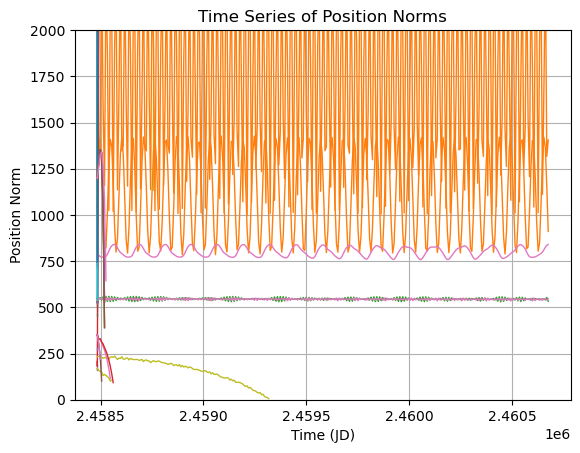

In [69]:
for sat in catalogue:
    times = [entry[0] for entry in sat.ephemeris]
    positions = [entry[1] for entry in sat.ephemeris]
    
    # Calculate the norms of the positions
    norms = [np.linalg.norm(pos)-6378.137 for pos in positions]
    
    # Plot
    plt.plot(times, norms, label="Satellite", linewidth=1)

plt.xlabel("Time (JD)")
plt.ylabel("Position Norm")
plt.ylim(0,2000)
plt.title("Time Series of Position Norms")
plt.grid(True)
plt.show()

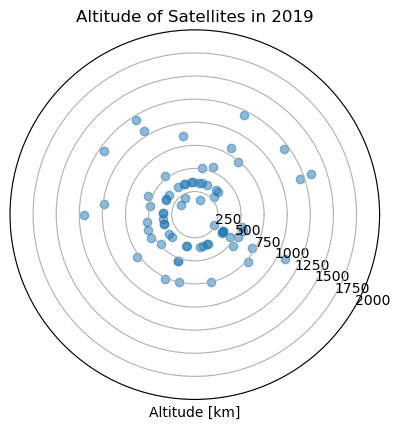

In [70]:
# for the final year create an orbital highway plot
y_values = [random.random() for _ in catalogue] # total number of objects
altitudes = [np.linalg.norm(sat.ephemeris[3][1])-6378.137 for sat in catalogue] # altitude of each object

# # create a scatter plot
# plt.scatter(altitudes, y_values, alpha=0.5)
# plt.xlabel('Altitude [km]')
# plt.xlim(0, 2000)

# # Display the plot
# plt.show()

# Create a new polar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

# Convert y_values to angles in the range [0, 2*pi]
angles = [y * 2 * np.pi for y in y_values]

# Plot on the radial plot
ax.scatter(angles, altitudes, alpha=0.5)

# Set the maximum radius limit
ax.set_rmax(2000)
ax.set_rlabel_position(-30)  # Move radial labels away from plotted line
ax.set_xlabel('Altitude [km]')
ax.set_xticks([])
ax.set_title('Altitude of Satellites in 2019')

# Display the plot
plt.show()

In [17]:
import numpy as np
import pandas as pd

# Lists to store the satellite names and their altitudes
satellite_names = []
all_altitudes = []

for obj in catalogue:
    ephemeris = obj.ephemeris
    if ephemeris:
        # Take every 10th entry in ephemeris and compute its altitude
        altitudes = [np.linalg.norm(e[1]) - 6378.137 for idx, e in enumerate(ephemeris) if idx % 100 == 0]
        all_altitudes.append(altitudes)
        
        # Assuming the object has an attribute named 'rso_name' for the satellite's name. 
        satellite_names.append(obj.rso_name)

# Finding the maximum length of ephemeris set to ensure our DataFrame has columns for all ephemeris data points.
max_length = max([len(altitudes) for altitudes in all_altitudes])

# Padding the altitudes list to have equal lengths
for altitudes in all_altitudes:
    while len(altitudes) < max_length:
        altitudes.append(np.nan)

# Construct a DataFrame
column_names = ['satellite'] + [f'Ephemeris_{i*10}' for i in range(max_length)]  # Naming columns for every 10th ephemeris set
df = pd.DataFrame(columns=column_names)
df['satellite'] = satellite_names
for i in range(max_length):
    df[f'Ephemeris_{i*10}'] = [altitudes[i] for altitudes in all_altitudes]

condition = df.select_dtypes(include=[float, int]).gt(3000).any(axis=1)
df = df.drop(df[condition].index)
print(df)


          satellite  Ephemeris_0  Ephemeris_10  Ephemeris_20  Ephemeris_30  \
4        USA 22 DEB   188.000540    171.394785           NaN           NaN   
5       DELTA 1 DEB  1088.612733           NaN           NaN           NaN   
9    FENGYUN 1C DEB   861.270700           NaN           NaN           NaN   
11  COSMOS 2251 DEB  1334.445148   1414.241534   1366.549465   1417.085929   
13   FENGYUN 1C DEB   736.821854           NaN           NaN           NaN   
..              ...          ...           ...           ...           ...   
70      Starlink-2B   525.000000           NaN           NaN           NaN   
71      Starlink-2B   525.000000           NaN           NaN           NaN   
72      Starlink-2C   530.000000           NaN           NaN           NaN   
73      Starlink-2C   530.000000           NaN           NaN           NaN   
74      Starlink-2C   530.000000           NaN           NaN           NaN   

    Ephemeris_40  
4            NaN  
5            NaN  
9     

d:\Programs\Anaconda\envs\fspsim\lib\site-packages\joypy\joyplot.py:234: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")
d:\Programs\Anaconda\envs\fspsim\lib\site-packages\joypy\joyplot.py:279: UserWarning: The data contains a group with a single distinct value (349.9999999999991) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
d:\Programs\Anaconda\envs\fspsim\lib\site-packages\joypy\joyplot.py:279: UserWarning: The data contains a group with a single distinct value (350.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
d:\Programs\Anaconda\envs\fspsim\lib\site-packages\joypy\joyplot.py:279: UserWarning: The data contains a group with a single distinct value (530.0000000000009) having infinite probabi

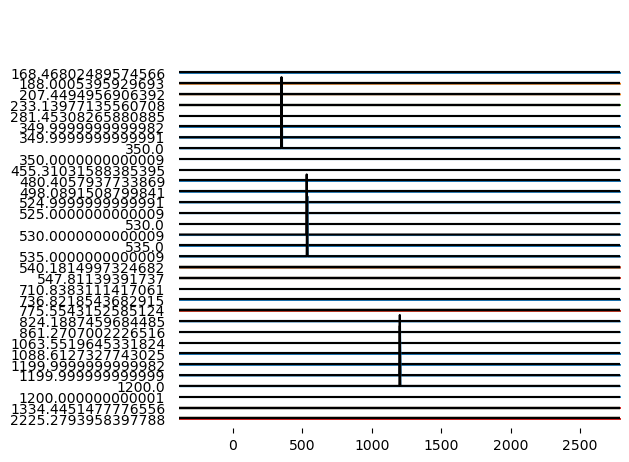

In [19]:
fig, axes = jp.joyplot(df, by="Ephemeris_0")

75


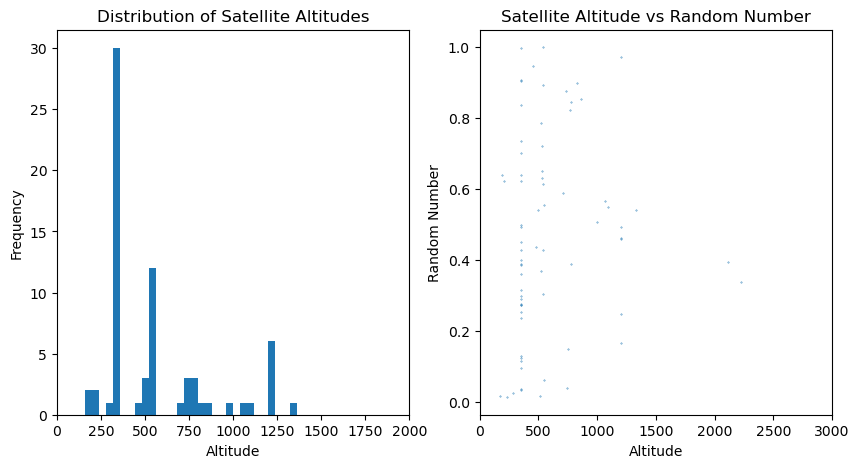

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
y_values = [random.random() for _ in catalogue]
altitudes = [np.linalg.norm(sat.ephemeris[3][1])-6378.137 for sat in catalogue] # altitude of each object

print(len(altitudes))
# Create a histogram of the altitudes
ax1.hist(altitudes, bins=50, range=(0, 2000))

# Add labels and title to the plot
ax1.set_xlabel('Altitude')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 2000)
ax1.set_title('Distribution of Satellite Altitudes')

# Plot the second chart on the second subplot
ax2.scatter(altitudes, y_values, s=0.1, alpha=1)

# Add labels and title to the plot
ax2.set_xlabel('Altitude')
ax2.set_ylabel('Random Number')
ax2.set_xlim(0, 3000)
ax2.set_title('Satellite Altitude vs Random Number')

# Display the plot
plt.show()

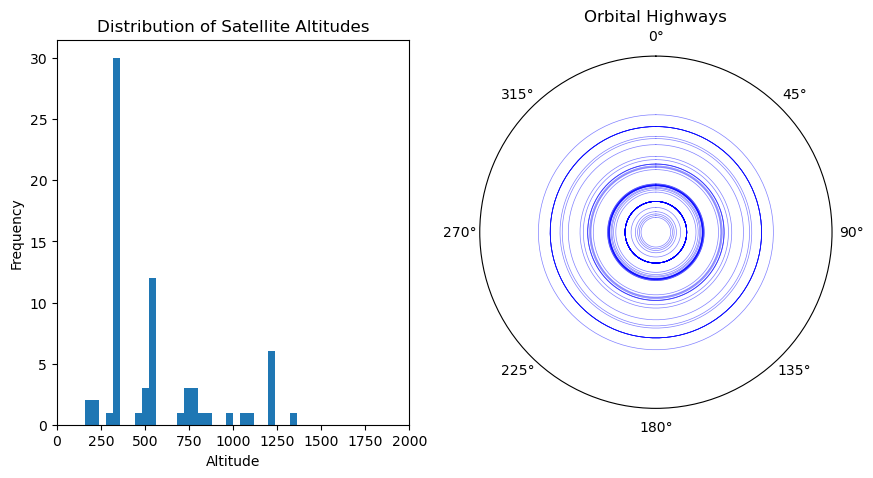

In [72]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='polar')

y_values = [random.random() for _ in catalogue]
altitudes = [np.linalg.norm(sat.ephemeris[3][1])-6378.137 for sat in catalogue]  # altitude of each object

# Create a histogram of the altitudes on the first subplot
ax1.hist(altitudes, bins=50, range=(0, 2000))
ax1.set_xlabel('Altitude')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 2000)
ax1.set_title('Distribution of Satellite Altitudes')

# A full circle in radians
theta = np.linspace(0, 2 * np.pi, 100)  

# For each altitude, plot a circle on the polar plot
for altitude in altitudes:
    ax2.plot(theta, [altitude] * len(theta), alpha=0.5, linewidth=0.5, color='blue')  # You can adjust the linewidth and alpha for visibility

# Adjustments to the polar plot
ax2.set_rlim(0, 2000)  # Set radial limits
ax2.set_theta_offset(np.pi/2)  # Start from the top
ax2.set_theta_direction(-1)  # Clockwise direction
ax2.grid(False)
ax2.set_title('Orbital Highways')
ax2.set_yticks([])  # Remove y-axis ticks

plt.show()

In [55]:
df.tail()

,satellite,Ephemeris_0,Ephemeris_10,Ephemeris_20,Ephemeris_30,Ephemeris_40
70,Starlink-2B,525.0,NaN,NaN,NaN,NaN
71,Starlink-2B,525.0,NaN,NaN,NaN,NaN
72,Starlink-2C,530.0,NaN,NaN,NaN,NaN
73,Starlink-2C,530.0,NaN,NaN,NaN,NaN
74,Starlink-2C,530.0,NaN,NaN,NaN,NaN
